# NYC Teacher Salary Analysis

## Executive Summary

## Background



In [34]:
import numpy as np
import pandas as pd
from scipy import stats
from src.wrangle import read_and_filter_data

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
pd.set_option('display.max_rows', 50)

import warnings
warnings.filterwarnings('ignore')
# plt.style.use('tableau-colorblind10')

## Acquire
Data: [NYC Citywide Payroll Data (Fiscal Year)](https://data.cityofnewyork.us/City-Government/Citywide-Payroll-Data-Fiscal-Year-/k397-673e)<br>

Let's acquire the prepared teachers payroll data from our file, `./data/teachers_payroll.parquet`.


In [35]:
# Load the prepared teachers salaries
df = read_and_filter_data()

In [36]:
# Let's check out the data's size, columns, and datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410968 entries, 0 to 410967
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   Fiscal Year                             410968 non-null  Int16         
 1   Employee ID                             410968 non-null  object        
 2   Hire Date                               410968 non-null  datetime64[ns]
 3   Hire Year                               410968 non-null  Int16         
 4   Years of Employment                     410968 non-null  Int16         
 5   Employment Category                     410968 non-null  category      
 6   Salary                                  410968 non-null  Int32         
 7   Additional Pay                          401615 non-null  float64       
 8   UFT Dues                                410968 non-null  float64       
 9   Net Salary                           

In [37]:
# Let's take a look at an individual record
df.sample(1).T

,92089
Fiscal Year,2016
Employee ID,17442
Hire Date,1996-09-03 00:00:00
Hire Year,1996
Years of Employment,20
Employment Category,6+
Salary,87763
Additional Pay,NaN
UFT Dues,1346.4
Net Salary,86416.6


In [38]:
# Let's look at the summary statistics of our numeric features.
df.describe().round().T

,count,mean,min,25%,50%,75%,max,std
Fiscal Year,410968.0,2019.0,2015.0,2017.0,2019.0,2021.0,2023.0,3.0
Hire Date,410968,2004-09-30 23:43:59.434700288,1955-09-09 00:00:00,1999-02-02 00:00:00,2004-09-07 00:00:00,2012-09-04 00:00:00,2022-05-20 00:00:00,NaN
Hire Year,410968.0,2004.0,1955.0,1999.0,2004.0,2012.0,2022.0,9.0
Years of Employment,410968.0,15.0,1.0,8.0,15.0,21.0,65.0,8.0
Salary,410968.0,93399.0,49908.0,79655.0,93753.0,106058.0,148657.0,18373.0
Additional Pay,401615.0,2197.0,0.0,0.0,0.0,3056.0,94467.0,4041.0
UFT Dues,410968.0,1434.0,1295.0,1373.0,1431.0,1497.0,1572.0,84.0
Net Salary,410968.0,91965.0,48613.0,78359.0,92289.0,104527.0,147160.0,18341.0
Previous Salary,410968.0,88776.0,44182.0,75218.0,88984.0,102009.0,148657.0,18786.0
Total Pay,401615.0,95627.0,49908.0,81484.0,94198.0,109601.0,203242.0,20282.0


In [39]:
# Let's take a look at the summary statistics for our categorical features.
df.select_dtypes(include='category').describe().T

,count,unique,top,freq
Employment Category,410968,2,6+,340723
Salary Category,410968,5,80k-100k,156008
Contract Period,410968,3,2009-2018,182684
Additional Pay Category,401615,3,$0,210569
Salary Delta Category,410966,4,0-5%,167440
Delta Category,410966,2,Salary Increased,366395
Compensation Category,407593,2,Compensation Increased,396971
Salary Monetary Diff Category,410968,4,0-$5k,230043


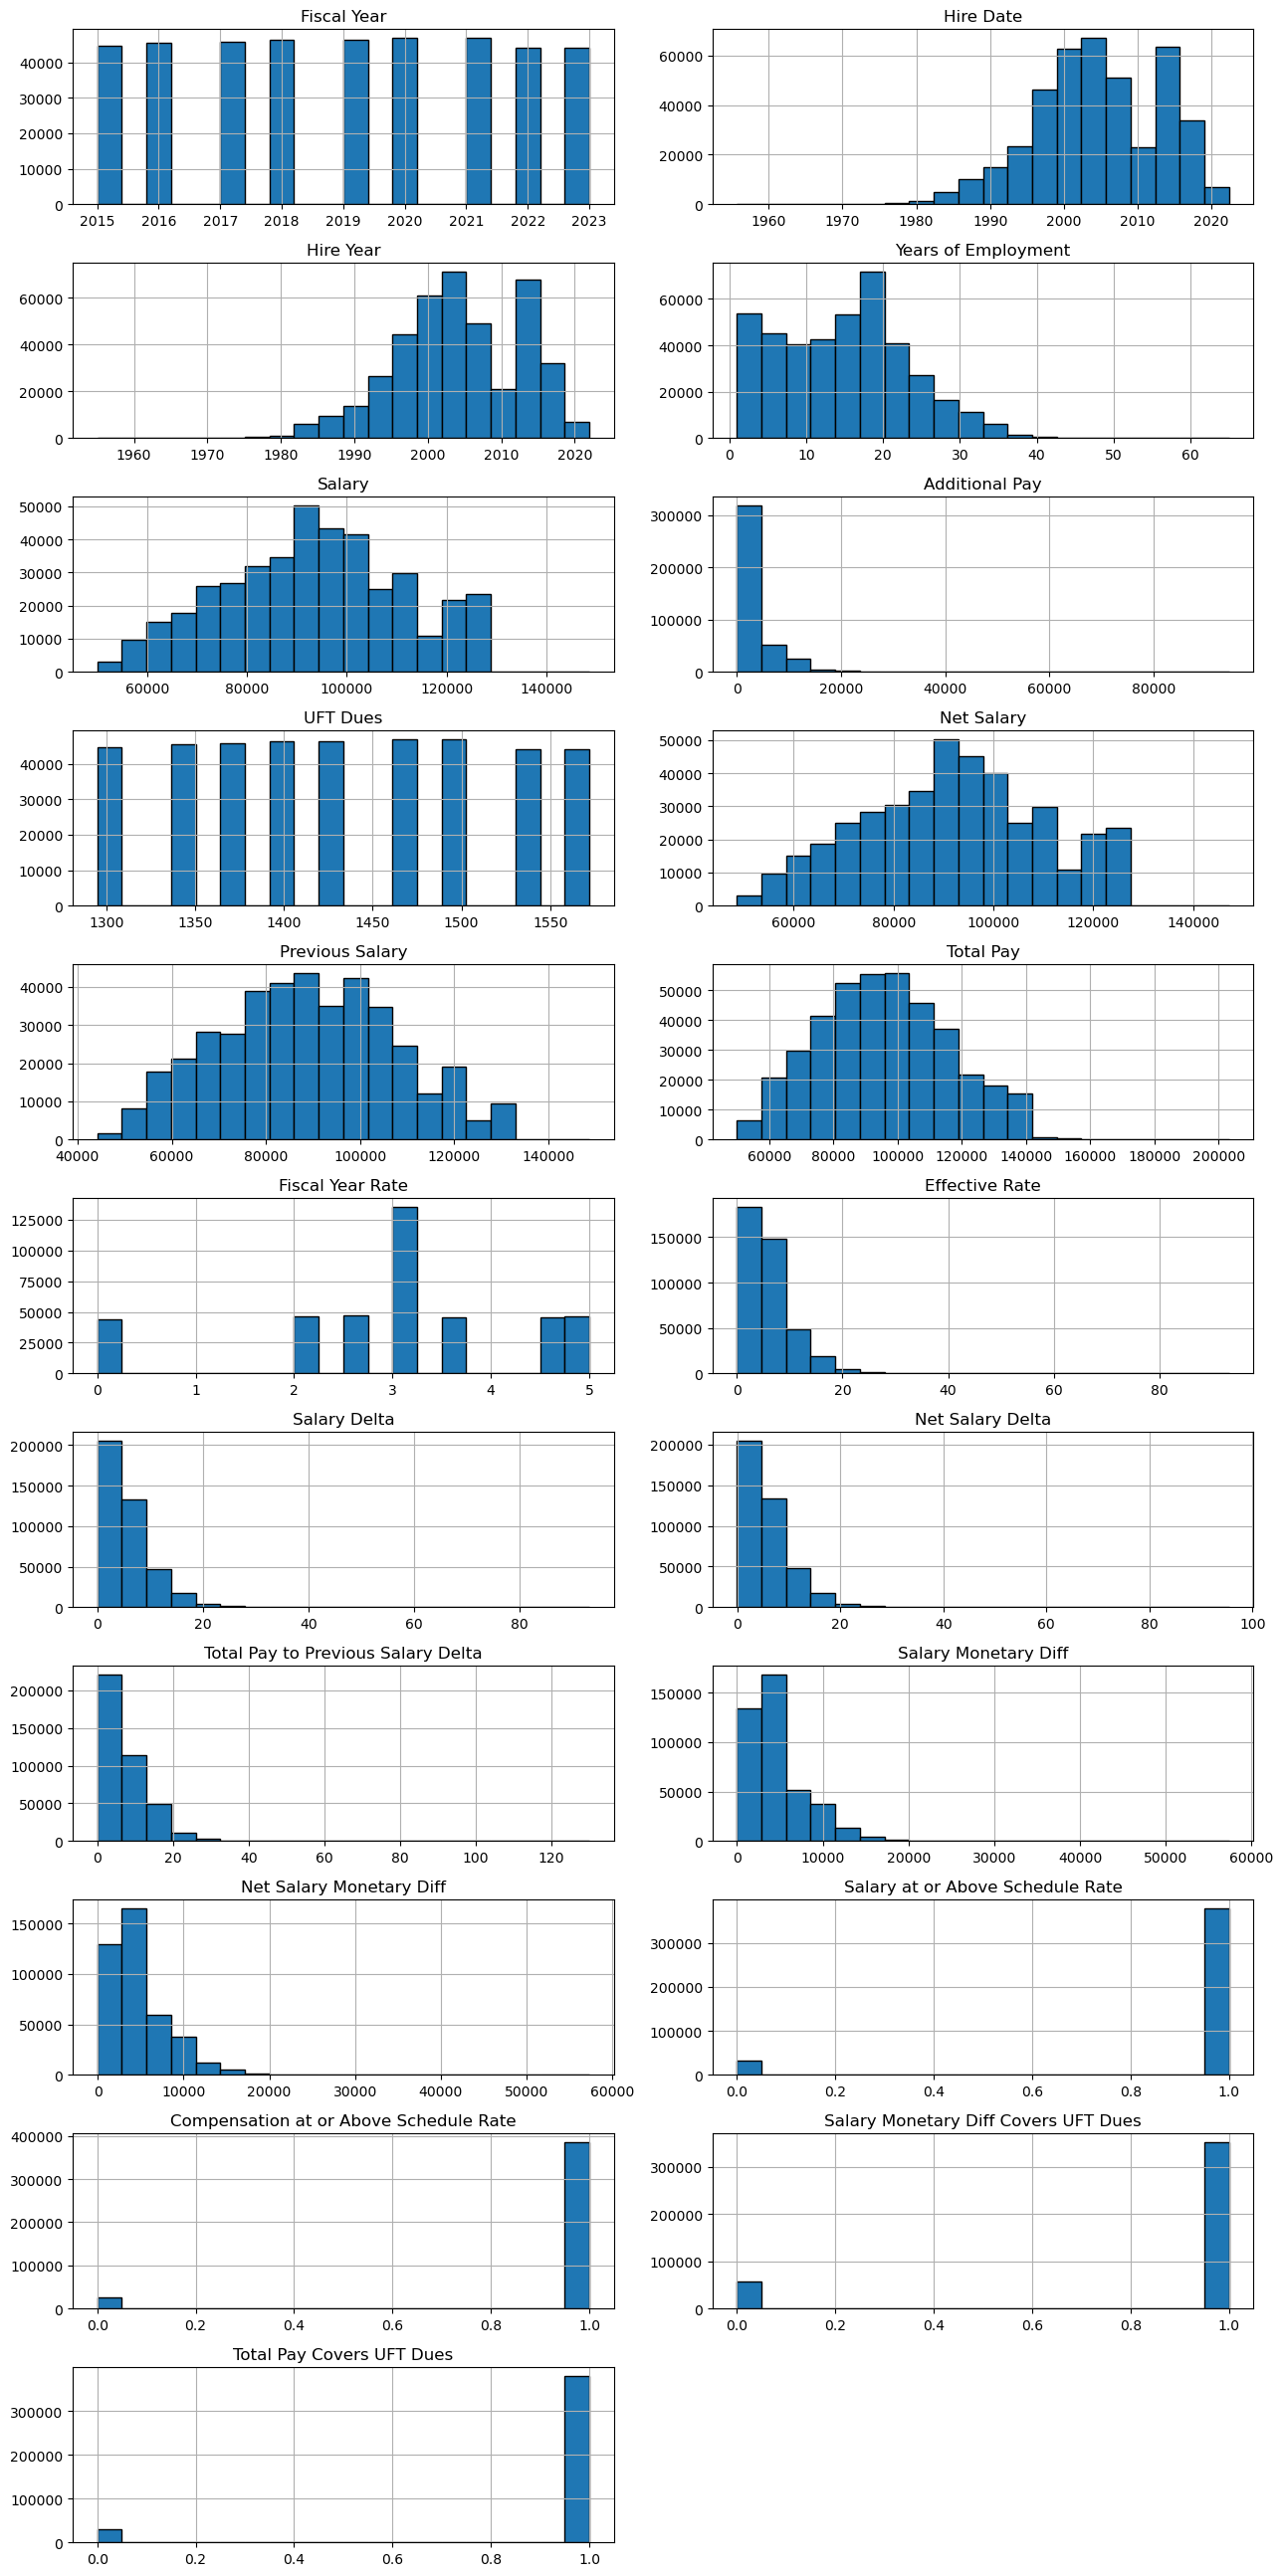

In [40]:
# Let's visualize the distributions of our numeric features.
df.hist(figsize=(13,26), ec='black', layout=(11, 2), bins=20)
plt.tight_layout();

### Inital Findings
- Each record represents a teacher's salary for a given `fiscal year`.
    - A `fiscal year` starts on July 1st and ends on June 30th of the following years.
- There are more than 40K teacher salaries each year.
- There are 410,968 teacher salaries from 2015 - 2023.
- Most teachers were hired in the early 2000's with an average tenure of 15 years.
    - 25th percentile of teachers have tenure of 8 years.
    - Bimodal distribution of teachers hired in the early 2000's and mid-2010's
- Most teachers salaries range from $80K to $100K
    - Teachers most commonly earn $0 in `additional pay`.
- Teachers most commonly:
    - Earn a higher `salary` year over year.
    - Earn a higher `total pay` year over year.
        - `Total pay` is equal to `salary` + `additional pay`.
    - Earn a year over year salary monetary increase of $0-$5K.
    - Earn a 0-5% increase in salary year over year, measured by `Salary Delta`
- United Federation of Teachers Union dues increase over time.   
- Teachers most commonly earn more than the yearly schedule rate, taking UFT dues into account.

## Exploratory Data Analysis

In [57]:
df_headcount = df.groupby('Fiscal Year').size()

<Axes: xlabel='Fiscal Year'>

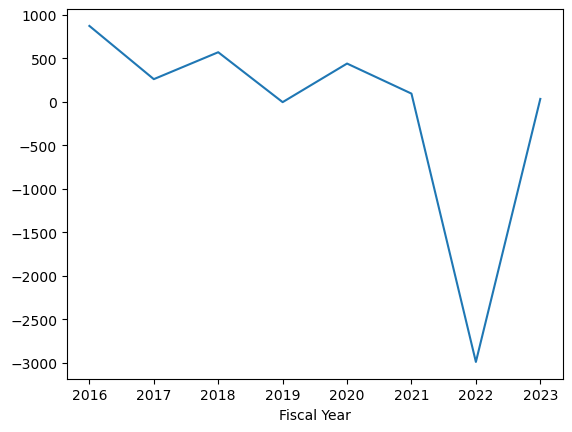

In [65]:
df_headcount.diff().plot(kind='line')

In [158]:
df_rate_summary = df[df['Fiscal Year']>=2015].groupby(by=['Employment Category','Fiscal Year'])\
                    .agg({'Fiscal Year Rate': 'min',
                          #'Effective Rate':'median'
                          'Salary Delta': ['median', 'min']
                          }).round(2)


In [159]:
df_rate_summary

Fiscal Year Rate Salary Delta      
                                             min       median   min
Employment Category Fiscal Year                                    
0-5                 2015                     3.0         6.61  5.09
                    2016                     3.5         4.83  2.30
                    2017                     4.5         5.90  1.55
                    2018                     5.0         6.37  0.14
                    2019                     2.0         3.32  1.63
                    2020                     2.5         3.82  2.05
                    2021                     3.0         4.33  0.77
                    2022                     0.0         1.23  0.00
                    2023                     3.0         1.45  0.00
6+                  2015                     3.0         5.09  0.00
                    2016                     3.5         3.49  0.00
                    2017                     4.5         4.55  0.46
                    2018                     5.0         5.02  0.13
                    2019                     2.0         2.00  0.47
                    2020                     2.5         2.50  0.08
                    2021                     3.0         3.00  0.54
                    2022                     0.0         0.00  0.00
                    2023                     3.0         0.00  0.00

In [160]:
df_rate_summary.columns = df_rate_summary.columns.get_level_values(0)

In [161]:
df_rate_summary = df_rate_summary.groupby(level=0).cumsum()
df_rate_summary = df_rate_summary.reset_index(col_level=-1).dropna()

In [162]:
df_rate_summary.reset_index(inplace=True)

In [163]:
df_rate_summary

index                                 Fiscal Year Rate Salary Delta       
         Employment Category Fiscal Year              min       median    min
0      0                 0-5        2015              3.0         6.61   5.09
1      1                 0-5        2016              6.5        11.44   7.39
2      2                 0-5        2017             11.0        17.34   8.94
3      3                 0-5        2018             16.0        23.71   9.08
4      4                 0-5        2019             18.0        27.03  10.71
5      5                 0-5        2020             20.5        30.85  12.76
6      6                 0-5        2021             23.5        35.18  13.53
7      7                 0-5        2022             23.5        36.41  13.53
8      8                 0-5        2023             26.5        37.86  13.53
9      9                  6+        2015              3.0         5.09   0.00
10    10                  6+        2016              6.5         8.58   0.00
11    11                  6+        2017             11.0        13.13   0.46
12    12                  6+        2018             16.0        18.15   0.59
13    13                  6+        2019             18.0        20.15   1.06
14    14                  6+        2020             20.5        22.65   1.14
15    15                  6+        2021             23.5        25.65   1.68
16    16                  6+        2022             23.5        25.65   1.68
17    17                  6+        2023             26.5        25.65   1.68

In [156]:
df_rate_summary.pivot(index=['Fiscal Year'], columns='Employment Category')

KeyError: "None of ['Fiscal Year', 'Employment Category'] are in the columns"

TypeError: only integer scalar arrays can be converted to a scalar index

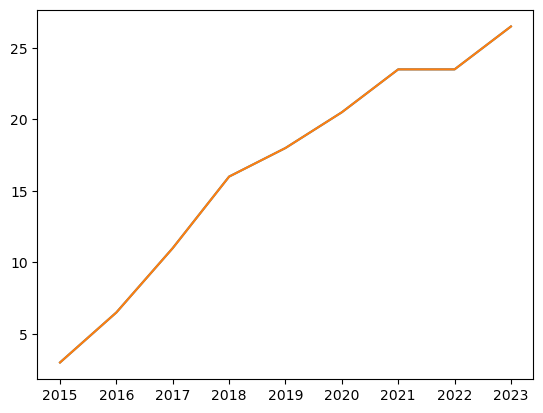

In [140]:
df_rate_summary.pivot(index=['Fiscal Year'], columns='Employment Category').plot();

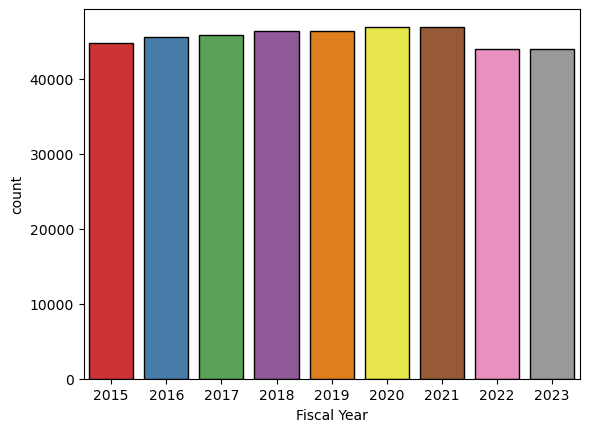

In [41]:
sns.countplot(x=df['Fiscal Year'],
              palette='Set1',
              ec='black');

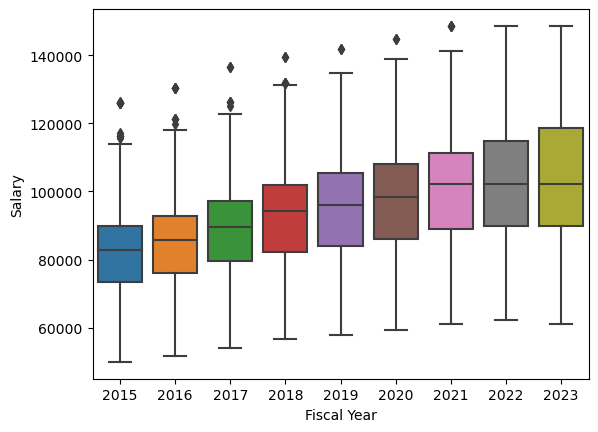

In [42]:
sns.boxplot(data=df, y='Salary', x='Fiscal Year');

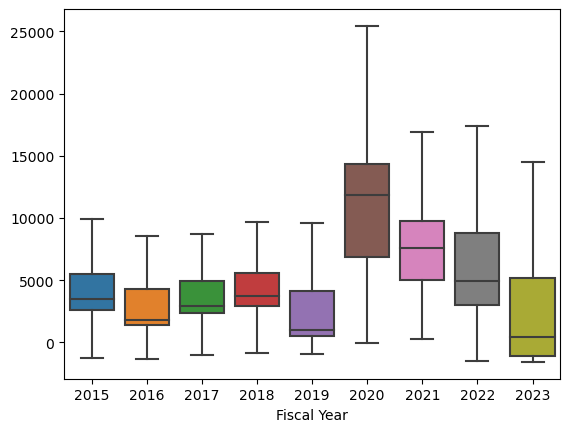

In [43]:
sns.boxplot(data=df, y=df['Additional Pay']+df['Salary Monetary Diff']-df['UFT Dues'], x='Fiscal Year',showfliers=False);

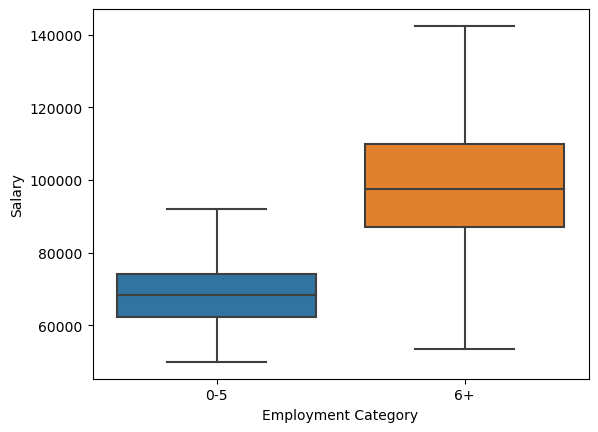

In [44]:
sns.boxplot(data=df, y='Salary', x='Employment Category',showfliers=False);

In [45]:
df_2022 = df[(df['Fiscal Year']==2022)]
df_2023 = df[(df['Fiscal Year']==2023)]
df_2022_no_change = df[(df['Fiscal Year']==2022)&(df['Delta Category']=='No Change')]
df_2023_no_change = df[(df['Fiscal Year']==2023)&(df['Delta Category']=='No Change')]

In [46]:
pd.crosstab(df_2022['Employment Category'],df_2022['Delta Category'])

Delta Category,No Change,Salary Increased
Employment Category,,
0-5,677,4892
6+,21366,17048


In [47]:
pd.crosstab(df_2023['Employment Category'],df_2023['Delta Category'])

Delta Category,No Change,Salary Increased
Employment Category,,
0-5,603,4987
6+,21923,16502


In [48]:
df_2023[df_2023['Employee ID'].isin(df_2022_no_change['Employee ID'].values)]

,Fiscal Year,Employee ID,Hire Date,Hire Year,Years of Employment,Employment Category,Salary,Additional Pay,UFT Dues,Net Salary,...,Contract Period,Additional Pay Category,Salary Delta Category,Delta Category,Compensation Category,Salary Monetary Diff Category,Salary at or Above Schedule Rate,Compensation at or Above Schedule Rate,Salary Monetary Diff Covers UFT Dues,Total Pay Covers UFT Dues
36,2023,7,2000-09-05,2000,23,6+,128657,864.29,1572.0,127085.0,...,2022-2027,0-$1K,5-10%,Salary Increased,Compensation Increased,$5k-$10k,1,1,1,1
45,2023,8,1996-09-03,1996,27,6+,128657,565.76,1572.0,127085.0,...,2022-2027,0-$1K,0%,No Change,No Change,0,0,0,0,0
68,2023,12,1997-10-01,1997,26,6+,128657,225.00,1572.0,127085.0,...,2022-2027,0-$1K,0%,No Change,No Change,0,0,0,0,0
77,2023,13,1998-02-02,1998,25,6+,128657,838.04,1572.0,127085.0,...,2022-2027,0-$1K,0%,No Change,Compensation Increased,0,0,0,0,0
96,2023,17,1996-09-03,1996,27,6+,128657,475.00,1572.0,127085.0,...,2022-2027,0-$1K,0%,No Change,No Change,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410763,2023,76250,1997-09-02,1997,26,6+,121078,475.00,1572.0,119506.0,...,2022-2027,0-$1K,0%,No Change,No Change,0,0,0,0,0
410789,2023,76253,1987-09-09,1987,36,6+,128657,520.38,1572.0,127085.0,...,2022-2027,0-$1K,0%,No Change,No Change,0,0,0,0,0
410816,2023,76265,1997-01-24,1997,26,6+,128657,883.42,1572.0,127085.0,...,2022-2027,0-$1K,0%,No Change,Compensation Increased,0,0,0,0,0
410825,2023,76266,2004-09-07,2004,19,6+,109852,NaN,1572.0,108280.0,...,2022-2027,NaN,0%,No Change,NaN,0,0,0,0,0


In [49]:
df_2022[df_2022['Employee ID'].isin(df_2023_no_change['Employee ID'].values)]

,Fiscal Year,Employee ID,Hire Date,Hire Year,Years of Employment,Employment Category,Salary,Additional Pay,UFT Dues,Net Salary,...,Contract Period,Additional Pay Category,Salary Delta Category,Delta Category,Compensation Category,Salary Monetary Diff Category,Salary at or Above Schedule Rate,Compensation at or Above Schedule Rate,Salary Monetary Diff Covers UFT Dues,Total Pay Covers UFT Dues
9,2022,2,2003-03-14,2003,19,6+,104145,23897.86,1531.44,102613.56,...,2022-2027,$1k+,0-5%,Salary Increased,Compensation Increased,0-$5k,1,1,1,1
27,2022,5,2000-09-11,2000,22,6+,111350,5755.10,1531.44,109818.56,...,2022-2027,$1k+,0-5%,Salary Increased,Compensation Increased,0-$5k,1,1,0,1
44,2022,8,1996-09-03,1996,26,6+,128657,7608.85,1531.44,127125.56,...,2022-2027,$1k+,0%,No Change,Compensation Increased,0,1,1,0,1
67,2022,12,1997-10-01,1997,25,6+,128657,6532.76,1531.44,127125.56,...,2022-2027,$1k+,0%,No Change,Compensation Increased,0,1,1,0,1
76,2022,13,1998-02-02,1998,24,6+,128657,15129.46,1531.44,127125.56,...,2022-2027,$1k+,0%,No Change,Compensation Increased,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410854,2022,76270,1999-11-15,1999,23,6+,128657,6015.79,1531.44,127125.56,...,2022-2027,$1k+,5-10%,Salary Increased,Compensation Increased,$5k-$10k,1,1,1,1
410875,2022,76273,2010-09-07,2010,12,6+,106362,12241.03,1531.44,104830.56,...,2022-2027,$1k+,0-5%,Salary Increased,Compensation Increased,0-$5k,1,1,1,1
410895,2022,76276,1999-09-07,1999,23,6+,121078,5757.51,1531.44,119546.56,...,2022-2027,$1k+,5-10%,Salary Increased,Compensation Increased,$5k-$10k,1,1,1,1
410954,2022,76288,2008-08-28,2008,14,6+,104145,5556.54,1531.44,102613.56,...,2022-2027,$1k+,0-5%,Salary Increased,Compensation Increased,0-$5k,1,1,1,1


In [50]:
df_2023_no_change[df_2023_no_change['Employee ID'].isin(df_2022_no_change['Employee ID'].values)]

,Fiscal Year,Employee ID,Hire Date,Hire Year,Years of Employment,Employment Category,Salary,Additional Pay,UFT Dues,Net Salary,...,Contract Period,Additional Pay Category,Salary Delta Category,Delta Category,Compensation Category,Salary Monetary Diff Category,Salary at or Above Schedule Rate,Compensation at or Above Schedule Rate,Salary Monetary Diff Covers UFT Dues,Total Pay Covers UFT Dues
45,2023,8,1996-09-03,1996,27,6+,128657,565.76,1572.0,127085.0,...,2022-2027,0-$1K,0%,No Change,No Change,0,0,0,0,0
68,2023,12,1997-10-01,1997,26,6+,128657,225.00,1572.0,127085.0,...,2022-2027,0-$1K,0%,No Change,No Change,0,0,0,0,0
77,2023,13,1998-02-02,1998,25,6+,128657,838.04,1572.0,127085.0,...,2022-2027,0-$1K,0%,No Change,Compensation Increased,0,0,0,0,0
96,2023,17,1996-09-03,1996,27,6+,128657,475.00,1572.0,127085.0,...,2022-2027,0-$1K,0%,No Change,No Change,0,0,0,0,0
317,2023,63,2013-09-03,2013,10,6+,82308,475.00,1572.0,80736.0,...,2022-2027,0-$1K,0%,No Change,Compensation Increased,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410721,2023,76241,1996-09-03,1996,27,6+,121078,3492.36,1572.0,119506.0,...,2022-2027,$1k+,0%,No Change,Compensation Increased,0,0,1,0,1
410763,2023,76250,1997-09-02,1997,26,6+,121078,475.00,1572.0,119506.0,...,2022-2027,0-$1K,0%,No Change,No Change,0,0,0,0,0
410789,2023,76253,1987-09-09,1987,36,6+,128657,520.38,1572.0,127085.0,...,2022-2027,0-$1K,0%,No Change,No Change,0,0,0,0,0
410816,2023,76265,1997-01-24,1997,26,6+,128657,883.42,1572.0,127085.0,...,2022-2027,0-$1K,0%,No Change,Compensation Increased,0,0,0,0,0


In [51]:
df_delta_bar = df.groupby('Fiscal Year')['Delta Category']\
                 .value_counts(normalize=True)\
                 .round(2).reset_index()

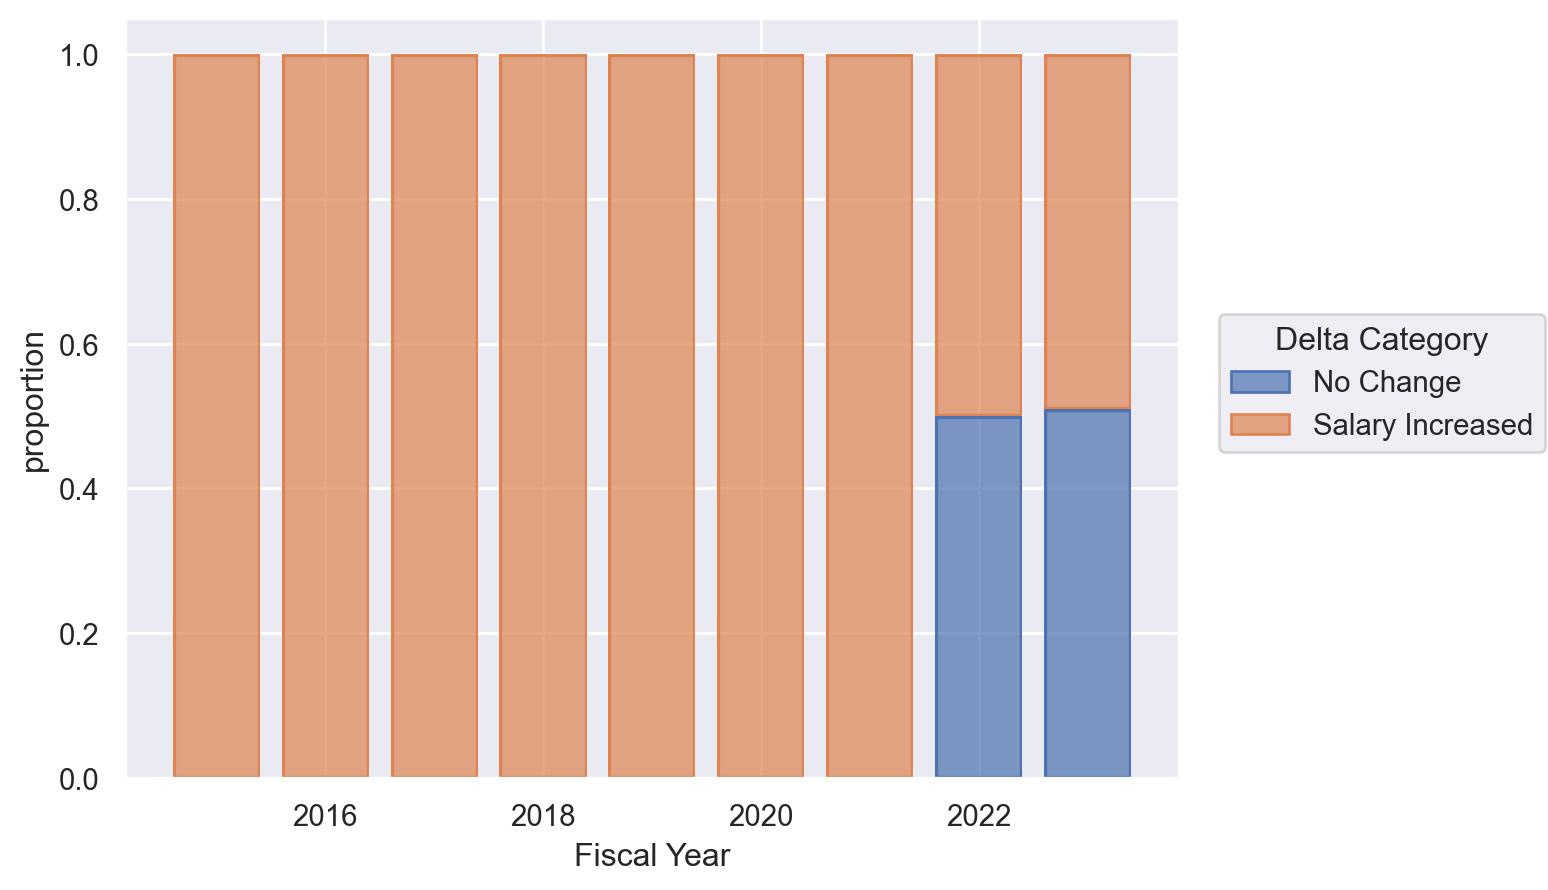

In [52]:
(
    so.Plot(data=df_delta_bar, x='Fiscal Year', y='proportion', color='Delta Category')
    .add(so.Bar(), so.Stack())
)

In [53]:
df_comp_bar = df.groupby('Fiscal Year')['Compensation at or Above Schedule Rate']\
                .value_counts(normalize=True)\
                .round(2).reset_index()

In [54]:
df_comp_bar['Compensation at or Above Schedule Rate'] = (
    np.where(df_comp_bar['Compensation at or Above Schedule Rate']!=0,'At or Above','Below')
)

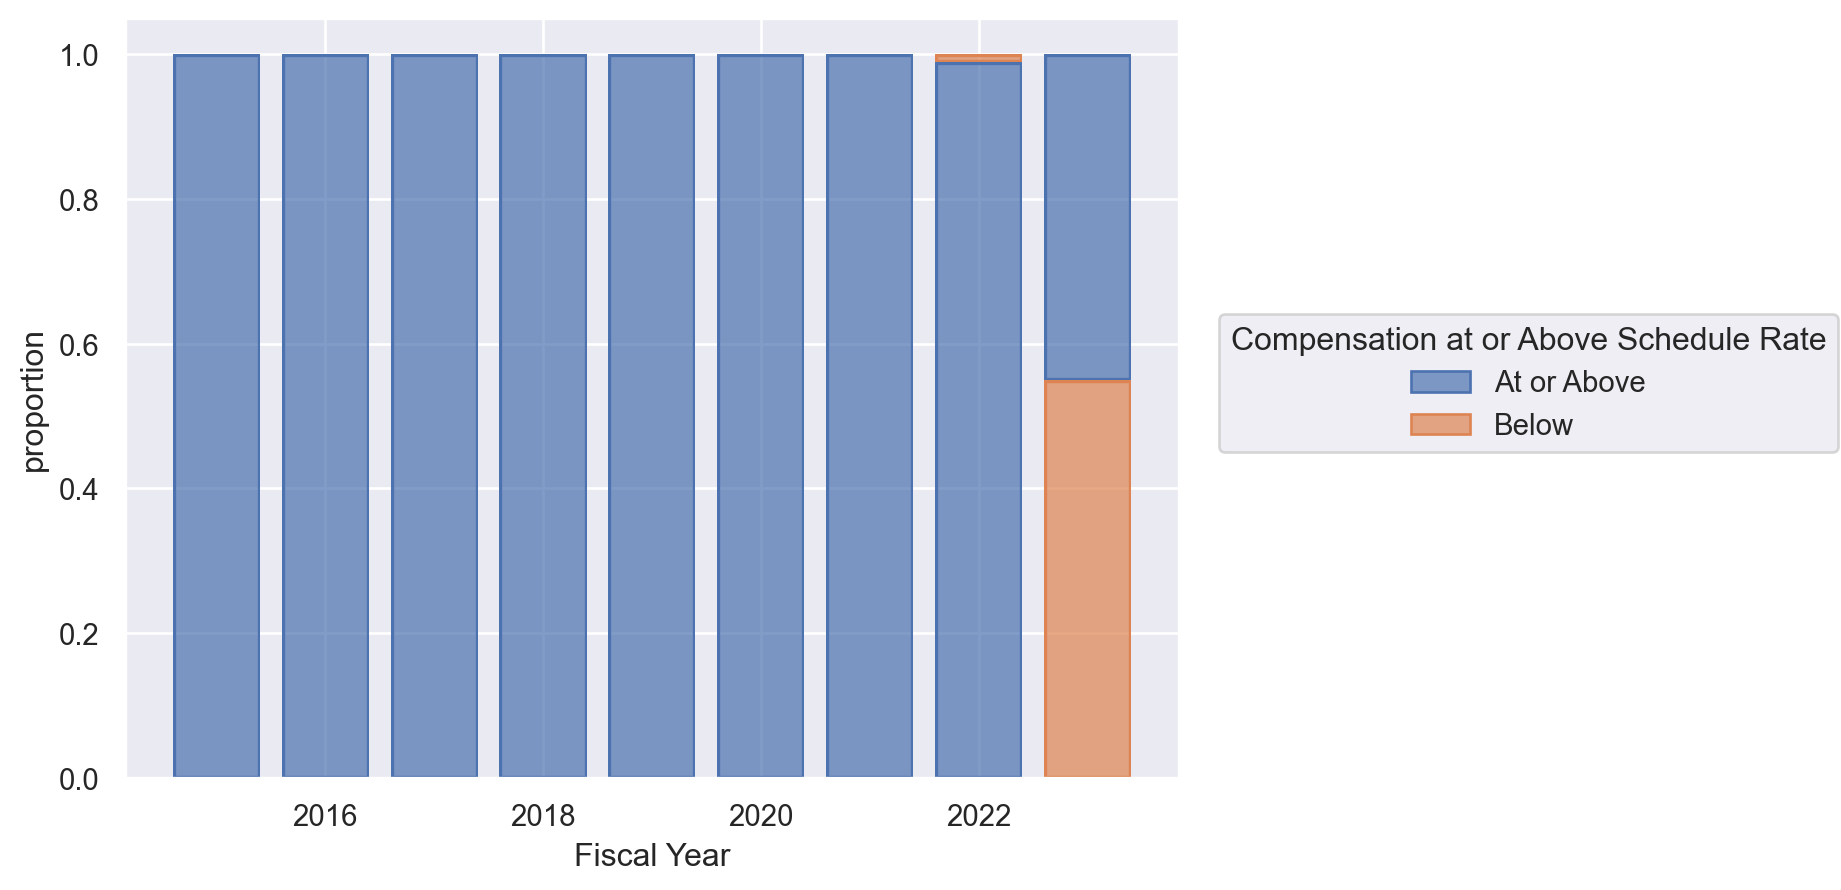

In [55]:
(
    so.Plot(data=df_comp_bar, x='Fiscal Year', y='proportion', color='Compensation at or Above Schedule Rate')
    .add(so.Bar(), so.Stack())
)

In [ ]:
df_rate_summary.columns = df_rate_summary.columns.get_level_values(0)
df_rate_summary = df_rate_summary.reset_index(col_level=-1).dropna()

In [ ]:
df_rate_summary

In [ ]:
p1 = (
    so.Plot(data=df_rate_summary, x='Fiscal Year')
    .add(so.Bar(), so.Dodge(), y='Salary Delta', color='Employment Category')
    .add(so.Dash(linewidth=3, color='black'), y='Fiscal Year Rate')
    .label(x='Year', y='Rate', title='Expect Less Pay at the Beginning of New Contract')
)
p1

In [ ]:
p2 = (
    so.Plot(data=df_rate_summary, x='Fiscal Year')
    .add(so.Bar(), so.Dodge(), y='Effective Rate', color='Employment Category')
    .add(so.Dash(linewidth=3, color='black'), y='Fiscal Year Rate')
    .label(x='Year', y='Rate', title='Expect Less Pay at the Beginning of New Contract')
)
p2

In [ ]:
# sns.countplot(data=df,
#               x='Fiscal Year',
#               hue='Salary Monetary Diff Covers UFT Dues');

# sns.countplot(data=df,
#               x='Fiscal Year',
#               hue='Total Pay Covers UFT Dues');

# sns.scatterplot(data=df_2023, x='Additional Pay', y='Salary Monetary Diff', hue='Total Pay Covers UFT Dues');

In [ ]:
# h_test_1 = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Category']))
# h_test_2 = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Delta Category']))
# h_test_3 = stats.chi2_contingency(pd.crosstab(df['Employment Category'], df['Salary Monetary Diff Category']))
# h_test_4 = stats.chi2_contingency(pd.crosstab(df['Salary Category'], df['Salary Delta Category']))
# h_test_5 = stats.chi2_contingency(pd.crosstab(df['Salary Category'], df['Salary Monetary Diff Category']))
# h_test_6 = stats.chi2_contingency(pd.crosstab(df_2021_to_2023['Degree'], df_2021_to_2023['Salary Simplified Delta Category']))